In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install statsmodels stargazer

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import glm
from statsmodels.genmod.families import NegativeBinomial
from patsy import dmatrices
from stargazer.stargazer import Stargazer
from statsmodels.iolib.summary2 import summary_col

# CIVIL WAR EXPOSURE AND VIOLENCE REPRODUCTION

## Table of contents
1. [Data Ingestion](#data-ingestion)
2. [Figure 1a and 1b](#Figure1a1b)
3. [Table 1](#Table1)
4. [Table 2](#Table2)
5. [Figure 2](#Figure2)
6. [Figure 3](#Figure3)
7. [Figure 4](#Figure4)
8. [Table A1](#TableA1)

## Data Ingestion <a name="data-ingestion"></a>

Load in the data and examine it

In [ ]:
# load in soccer data
soccer_data = pd.read_stata("/content/drive/My Drive/Econ 148 Project 3/Soccer_Replication/Soccer_Replication/soccer_data.dta")
soccer_data.head()

,player_id,player_name,war_before,war_after,year,team,nationality,position,age,league,...,oecd,weekly_wage,contract,asia,lac,income,ln_wage,ln_contract,num_country,ln_income
0,2726,Nelson de Jesus Dida,0.0,0.0,2004/05 Statistics,AC Milan,Brazil,G,31,UEFA Champions League,...,0,23000.0,14000000.0,0,1,8800.0,10.043249,16.454567,302,9.082507
1,2726,Nelson de Jesus Dida,0.0,0.0,2004/05 Statistics,AC Milan,Brazil,G,31,Italian Serie A,...,0,23000.0,14000000.0,0,1,8800.0,10.043249,16.454567,302,9.082507
2,2741,Juliano Belletti,0.0,0.0,2004/05 Statistics,Barcelona,Brazil,D,28,Spanish Primera DivisiÛn,...,0,48000.0,8600000.0,0,1,8800.0,10.778956,15.967273,302,9.082507
3,2741,Juliano Belletti,0.0,0.0,2004/05 Statistics,Barcelona,Brazil,D,28,UEFA Champions League,...,0,48000.0,8600000.0,0,1,8800.0,10.778956,15.967273,302,9.082507
4,2749,Cris,0.0,0.0,2004/05 Statistics,Lyon,Brazil,D,27,French Ligue 1,...,0,38000.0,4600000.0,0,1,8800.0,10.545341,15.341567,302,9.082507


In [ ]:
figure1a_data = pd.read_excel("/content/drive/My Drive/Econ 148 Project 3/Soccer_Replication/Soccer_Replication/Figure_1A.xlsx")
figure1a_data.head()

,League,cause,2005-2006,2006-2007,2007-2008,Average,Percent
0,Serie A TIM,Assault,1299,1357.0,1413.0,1356.333333,73.834150
1,Serie A TIM,Unsportsmanlike Conduct,207,320.0,281.0,269.333333,14.661586
2,Serie A TIM,Other Non-Violent,174,235.0,225.0,211.333333,11.504264
3,Serie A TIM,Total,1680,1912.0,1919.0,1837.000000,100.000000
4,NaN,NaN,,NaN,NaN,NaN,NaN


In [ ]:
figure1b_data = pd.read_excel("/content/drive/My Drive/Econ 148 Project 3/Soccer_Replication/Soccer_Replication/Figure_1B.xls")
figure1b_data.head()

,Motive,2004-2005,2005-2006,Sum,Percent
0,Violent Foul,446,464,910,64.447592
1,Unsporting Behavior,177,193,370,26.203966
2,Non-Violent Offense,56,76,132,9.348442
3,Grand Total,679,733,1412,100.000000


## Figure 1a and 1b <a name="Figure1a1b"></a>

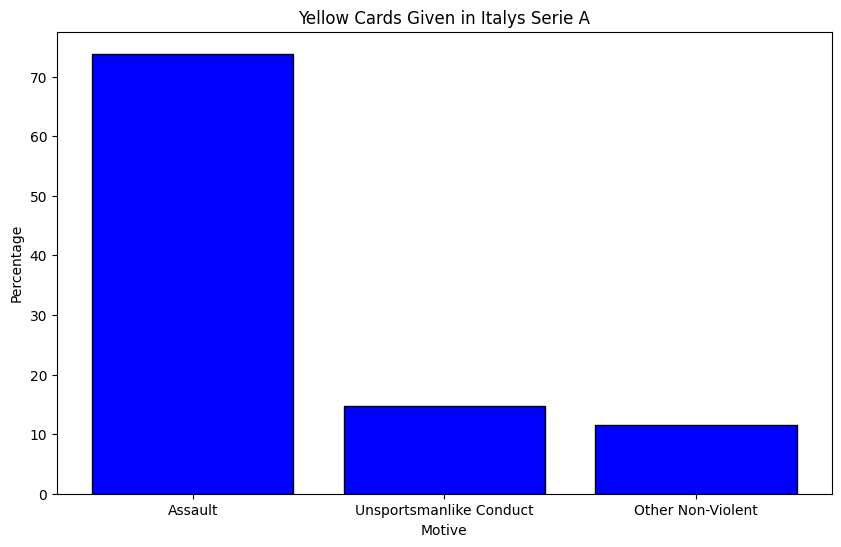

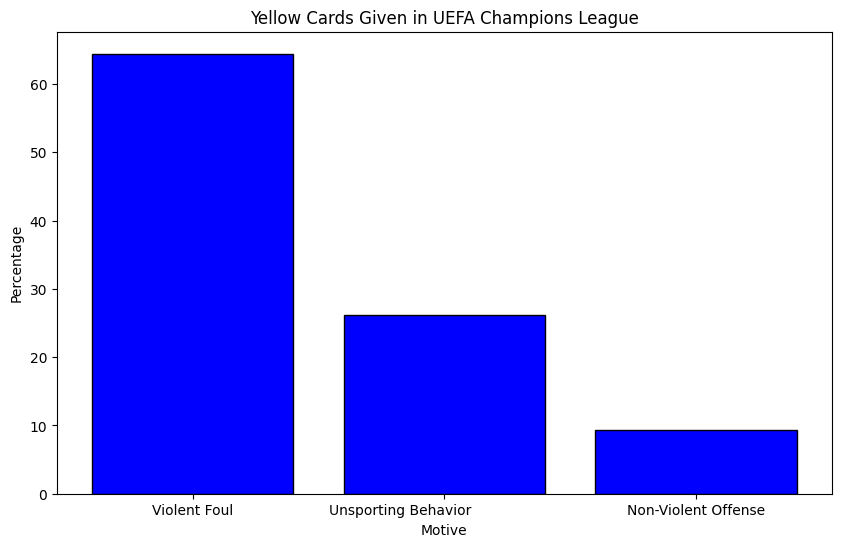

In [ ]:
figure1a_graph = figure1a_data.dropna()
figure1a_graph = figure1a_graph.drop(figure1a_graph.index[-1])

plt.figure(figsize=(10, 6))

# Plotting the histogram
plt.bar(figure1a_graph['cause'], figure1a_graph['Percent'], color='blue', edgecolor='black')

plt.title('Yellow Cards Given in Italys Serie A')
plt.xlabel('Motive')
plt.ylabel('Percentage')

plt.show()



figure1b_graph = figure1b_data.drop(figure1b_data.index[-1])

plt.figure(figsize=(10, 6))

# Plotting the histogram
plt.bar(figure1b_graph['Motive'], figure1b_graph['Percent'], color='blue', edgecolor='black')

plt.title('Yellow Cards Given in UEFA Champions League')
plt.xlabel('Motive')
plt.ylabel('Percentage')

plt.show()

## Table 1 <a name="Table1"></a>

In [ ]:
x_region = ["africa", "asia", "lac", "east_europe"]

# Renaming variables with labels (Stata labels are just for display, here we actually rename columns)
data_for_table_1 = soccer_data.rename(columns={
    "civwar": "Years of civil war",
    "ln_income": "Log GNI per capita",
    "r_law": "Rule of Law",
    "age": "Age",
    "ln_contract": "Log transfer fee",
    "games_start": "Games Started",
    "games_sub": "Substitute",
    "defender": "Defender",
    "forward": "Forward",
    "midfield": "Midfield",
    "goalie": "Goalie",
    "goals": "Goals",
    "champions": "European Champions League",
    "french": "French League",
    "german": "German League",
    "italian": "Italian League",
    "spanish": "Spanish League",
    "english": "English League",
    "war_after": "Civil war years post-birth",
    "war_before": "Civil war years pre-birth"
})

# Data cleaning: Dropping missing values in 'Log transfer fee'
data_for_table_1 = data_for_table_1.dropna(subset=["Log transfer fee"])

data_for_table_1['GNI per capita (2006)'] = np.exp(data_for_table_1['Log GNI per capita'])
data_for_table_1['Weekly salary (in ’000 USD)'] = data_for_table_1['weekly_wage'] / 1000
data_for_table_1['Transfer fee (in ’000 USD)'] = np.exp(data_for_table_1['Log transfer fee']) / 1000

# Define the conditions for filtering
condition = (
    data_for_table_1["Italian League"].notna() |
    data_for_table_1["European Champions League"].notna() |
    data_for_table_1["English League"].notna() |
    data_for_table_1["French League"].notna() |
    data_for_table_1["German League"].notna() |
    data_for_table_1["Spanish League"].notna()
) & (data_for_table_1['num_country'] >= 5)

# Columns to summarize
columns_to_summarize = [
    "yellow_card", "red_card", "Years of civil war", "Rule of Law", 'GNI per capita (2006)',
    "Age", "Weekly salary (in ’000 USD)", "Transfer fee (in ’000 USD)", "Games Started", "Substitute",
    "Goalie", "Defender", "Forward", "Midfield", "Goals"
] + x_region + ["oecd", "English League", "European Champions League",
                "French League", "German League", "Italian League", "Spanish League"]



# Summary statistics for filtered data
summary = data_for_table_1.loc[condition, columns_to_summarize].describe()
Table1 = summary.T[['mean', 'std', 'min', 'max', 'count']].rename(columns={'mean': 'Mean', 'std': 'Standard deviation', 'min': 'Minimum', 'max': 'Maximum', 'count': 'Observations'})
Table1['Mean'] = np.round(Table1['Mean'], 2)
Table1 = Table1.rename(index={'yellow_card': 'Yellow cards per player-season',
                              'red_card': 'Red cards per player-season',
                              'Years of civil war': 'Years of civil war (1980–2005)',
                              'Rule of Law': 'Rule of law (2005–2006)',
                              'Goals' : 'Goals scored per player-season',
                              'africa': 'Africa',
                              'asia': 'Asia',
                              'lac': 'Latin America/Caribbean',
                              'east_europe': 'Eastern Europe',
                              'oecd': 'OECD'
                              })
Table1['Observations'] = Table1['Observations'].round(0).astype(int)
#Table1.loc[:, 'GNI per capita (2006)'] = Table1.loc[:, 'GNI per capita (2006)'].round(0).astype(int)

Table1

,Mean,Standard deviation,Minimum,Maximum,Observations
Yellow cards per player-season,2.43,2.734036,0.000000,16.000000,5035
Red cards per player-season,0.16,0.416225,0.000000,3.000000,5035
Years of civil war (1980–2005),2.74,4.742952,0.000000,26.000000,5035
Rule of law (2005–2006),0.85,0.886973,-1.760000,2.100000,5035
GNI per capita (2006),26203.86,10923.413086,720.000061,44260.011719,4965
Age,25.99,4.404231,17.000000,41.000000,5035
Weekly salary (in ’000 USD),23.99,27.014382,0.000000,190.000000,5034
Transfer fee (in ’000 USD),6323.51,8198.477539,3.000000,78000.062500,5035
Games Started,13.80,11.485606,0.000000,40.000000,5035
Substitute,3.13,3.897660,0.000000,29.000000,5035


## Table 2 <a name="Table2"></a>

In [ ]:
# cant drop nans more columns than gni and civil war years pre and post because each one must have 5,035 that dont have these, the one with gni has
# 4,965, and the ones with the pre and post have 5033

# numbers may not be exactly the same due to differences in algorithms used by stata and statsmodels

# difficulties have been getting the syntax right and making sure the names line up and that the correct variables are in each
# need to read fine print and make sure u include everything even if it isnt in the table
# Also getting a lot of warnings about convergence and dividing by 0

# First regression

import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

m = 10000

data_for_table_2 = soccer_data.rename(columns={
    "civwar": "Years of civil war",
    "ln_income": "Log GNI per capita",
    "r_law": "Rule of Law",
    "age": "Age",
    "ln_contract": "Log transfer fee",
    "games_start": "Games Started",
    "games_sub": "Substitute",
    "defender": "Defender",
    "forward": "Forward",
    "midfield": "Midfield",
    "goalie": "Goalie",
    "goals": "Goals",
    "champions": "European Champions League",
    "french": "French League",
    "german": "German League",
    "italian": "Italian League",
    "spanish": "Spanish League",
    "english": "English League",
    "war_after": "Civil war years post-birth",
    "war_before": "Civil war years pre-birth"
})
data_for_table_2 = data_for_table_2.dropna(subset=["Log transfer fee"])

condition = (
    data_for_table_2["Italian League"].notna() |
    data_for_table_2["European Champions League"].notna() |
    data_for_table_2["English League"].notna() |
    data_for_table_2["French League"].notna() |
    data_for_table_2["German League"].notna() |
    data_for_table_2["Spanish League"].notna()
) & (data_for_table_2['num_country'] >= 5)


data_for_table_2 = data_for_table_2.loc[condition, :]

formula1 = ('yellow_card ~ Q("Years of civil war") + Age + Q("Log transfer fee") + Q("Games Started") + Q("Substitute") + Q("Defender") + '
           'Q("Forward") + Q("Midfield") + Goals + Q("European Champions League") + Q("French League") + Q("German League") + Q("Italian League") + '
            'Q("Spanish League") + africa + asia + lac + east_europe')


model_col1 = smf.negativebinomial(formula1, data=data_for_table_2).fit(cov_type='cluster', cov_kwds={'groups': data_for_table_2['nation']}, maxiter=m)
print(model_col1.summary())


data_for_table_2_col_2 = data_for_table_2[~data_for_table_2['Log GNI per capita'].isna()]

formula2 = ('yellow_card ~ Q("Years of civil war") + Q("Log GNI per capita") + Age + Q("Log transfer fee") + Q("Games Started") + Q("Substitute") + Q("Defender") + '
           'Q("Forward") + Q("Midfield") + Goals + Q("European Champions League") + Q("French League") + Q("German League") + Q("Italian League") + '
            'Q("Spanish League") + africa + asia + lac + east_europe')


model_col2 = smf.negativebinomial(formula2, data=data_for_table_2_col_2).fit(cov_type='cluster', cov_kwds={'groups': data_for_table_2_col_2['nation']}, maxiter=m)
print(model_col2.summary())


formula3 = ('yellow_card ~ Q("Years of civil war") + Q("Rule of Law") + Age + Q("Log transfer fee") + Q("Games Started") + Q("Substitute") + Q("Defender") + '
           'Q("Forward") + Q("Midfield") + Goals +Q("European Champions League") + Q("French League") + Q("German League") + Q("Italian League") + '
            'Q("Spanish League") + africa + asia + lac + east_europe')

model_col3 = smf.negativebinomial(formula3, data=data_for_table_2).fit(cov_type='cluster', cov_kwds={'groups': data_for_table_2['nation']}, maxiter=m)
print(model_col3.summary())


formula4 = ('red_card ~ Q("Years of civil war") + Q("Rule of Law") + Age + Q("Log transfer fee") + Q("Games Started") + Q("Substitute") + Q("Defender") + '
           'Q("Forward") + Q("Midfield") + Goals +Q("European Champions League") + Q("French League") + Q("German League") + Q("Italian League") + '
            'Q("Spanish League") + africa + asia + lac + east_europe')

model_col4 = smf.negativebinomial(formula4, data=data_for_table_2).fit(cov_type='cluster', cov_kwds={'groups': data_for_table_2['nation']}, maxiter=m)
print(model_col4.summary())

#running into issue where introducing the goalie variable in causing divisions by zero and other problems
X = data_for_table_2[["Years of civil war", "Rule of Law", 'Age', "Log transfer fee", "Games Started", "Substitute",
           "Forward", "Midfield", 'Goalie', "European Champions League", "French League", "German League", "Italian League",
            "Spanish League", 'africa', 'asia', 'lac', 'east_europe']]
X = sm.add_constant(X)
X_infl = sm.add_constant(data_for_table_2['Goalie'])

y = data_for_table_2['Goals']

model_col5 = sm.NegativeBinomialP(y, X)
model_col5 = model_col5.fit(cov_type='cluster', cov_kwds={'groups': data_for_table_2['nation']}, maxiter=m)


print(model_col5.summary())

data_for_table_2_col_6_and_7 = data_for_table_2[~(data_for_table_2["Civil war years post-birth"].isna()) & ~(data_for_table_2["Civil war years post-birth"].isna())]

formula6 = ('yellow_card ~ Q("Civil war years post-birth") + Q("Civil war years pre-birth") + Age + Q("Log transfer fee") + Q("Games Started") + Q("Substitute") + Q("Defender") + '
           'Q("Forward") + Q("Midfield") + Goals + Q("European Champions League") + Q("French League") + Q("German League") + Q("Italian League") + '
            'Q("Spanish League") + africa + asia + lac + east_europe')


model_col6 = smf.negativebinomial(formula6, data=data_for_table_2_col_6_and_7).fit(cov_type='cluster', cov_kwds={'groups': data_for_table_2_col_6_and_7['nation']}, maxiter=m)
print(model_col6.summary())


formula7 = ('red_card ~ Q("Civil war years post-birth") + Q("Civil war years pre-birth") + Age + Q("Log transfer fee") + Q("Games Started") + Q("Substitute") + Q("Defender") + '
           'Q("Forward") + Q("Midfield") + Goals + Q("European Champions League") + Q("French League") + Q("German League") + Q("Italian League") + '
            'Q("Spanish League") + africa + asia + lac + east_europe')


model_col7 = smf.negativebinomial(formula7, data=data_for_table_2_col_6_and_7).fit(cov_type='cluster', cov_kwds={'groups': data_for_table_2_col_6_and_7['nation']}, maxiter=m)
print(model_col7.summary())

Optimization terminated successfully.
         Current function value: 1.677944
         Iterations: 68
         Function evaluations: 71
         Gradient evaluations: 71
                     NegativeBinomial Regression Results                      
Dep. Variable:            yellow_card   No. Observations:                 5035
Model:               NegativeBinomial   Df Residuals:                     5016
Method:                           MLE   Df Model:                           18
Date:                Thu, 25 Apr 2024   Pseudo R-squ.:                  0.1900
Time:                        23:04:07   Log-Likelihood:                -8448.4
converged:                       True   LL-Null:                       -10430.
Covariance Type:              cluster   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                     NegativeBinomialP Regression Results                     
Dep. Variable:                  Goals   No. Observations:                 5035
Model:              NegativeBinomialP   Df Residuals:                     5016
Method:                           MLE   Df Model:                           18
Date:                Thu, 25 Apr 2024   Pseudo R-squ.:                  0.2396
Time:                        23:04:13   Log-Likelihood:                -6317.1
converged:                       True   LL-Null:                       -8307.5
Covariance Type:              cluster   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -7.8566      0.434    -18.101      0.000      -8.707      -7.006
Years of civil war         8.995e-05      0.005      0.019      0.985      -0.009     

In [ ]:
# Assuming `model1`, `model2`, ..., `model7` are your fitted Negative Binomial models
models = [model_col1, model_col2, model_col3, model_col4, model_col5, model_col6, model_col7]

# Create a Stargazer object
stargazer = Stargazer(models)

# Customize the stargazer object as needed, e.g.:
stargazer.title('Empirical Results: Civil War')
stargazer.custom_columns(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7'], [1, 1, 1, 1, 1, 1, 1])
stargazer.show_model_numbers(False)
stargazer.significance_levels([0.05, 0.01, 0.001])
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
  \caption{Empirical Results: Civil War}
\begin{tabular}{@{\extracolsep{5pt}}lccccccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
\\[-1.8ex] & \multicolumn{1}{c}{Model 1} & \multicolumn{1}{c}{Model 2} & \multicolumn{1}{c}{Model 3} & \multicolumn{1}{c}{Model 4} & \multicolumn{1}{c}{Model 5} & \multicolumn{1}{c}{Model 6} & \multicolumn{1}{c}{Model 7}  \\
\hline \\[-1.8ex]
 Age & 0.013$^{***}$ & 0.013$^{***}$ & 0.013$^{***}$ & 0.013$^{}$ & 0.021$^{**}$ & 0.013$^{***}$ & 0.011$^{}$ \\
& (0.002) & (0.002) & (0.002) & (0.007) & (0.006) & (0.002) & (0.007) \\
 European Champions League & & & & & 0.211$^{*}$ & & \\
& & & & & (0.086) & & \\
 Forward & & & & & 1.647$^{***}$ & & \\
& & & & & (0.078) & & \\
 French League & & & & & 0.078$^{}$ & & \\
& & & & & (0.063) & & \\
 Games Started & & & & & 0.087$^{***}$ & & \\
& & & & & (0.002) & & \\
 German League & & & & & 0.244$^{***}$ & & \\
& & & & & (0.059) & & \\
 Goalie & & & & & -52.418$^{***}$ & & \\
& & & & & (0.336) & 

## Figure 2 <a name="Figure2"></a>

Yellow cards and civil war (conditional on control variables in Table 2, regression 1) – all countries.

Biggest struggle here was realizing that we do not want to predict the total yellow cards, we need to divide by number of player seasons. In addition, for a long time I thought we had to use our original regression but it turns out we just do a new one for these plots. However, the plots are still not exactly the same and I am not sure what is causing these differences. I had to change the original stata code a bit because it was trying to predict total cards instead of average, and I am not sure exactly how they did this originally. Also, the CIV circle, which is Cote de Ivore, is showing up much higher than in the paper for all three of these similar figures. In soccer_data, there are two names for the same country, Cote de Ivore and Ivory Coast, but I have confirmed that these both share the same country code and both get mapped to CIV in the merge. I am not sure of the origin of this issue.

In [ ]:
wb_codes = pd.read_csv("/content/drive/My Drive/Econ 148 Project 3/Soccer_Replication/Soccer_Replication/Wb_codes.csv")
soccer_data = pd.read_stata("/content/drive/My Drive/Econ 148 Project 3/Soccer_Replication/Soccer_Replication/soccer_data.dta")

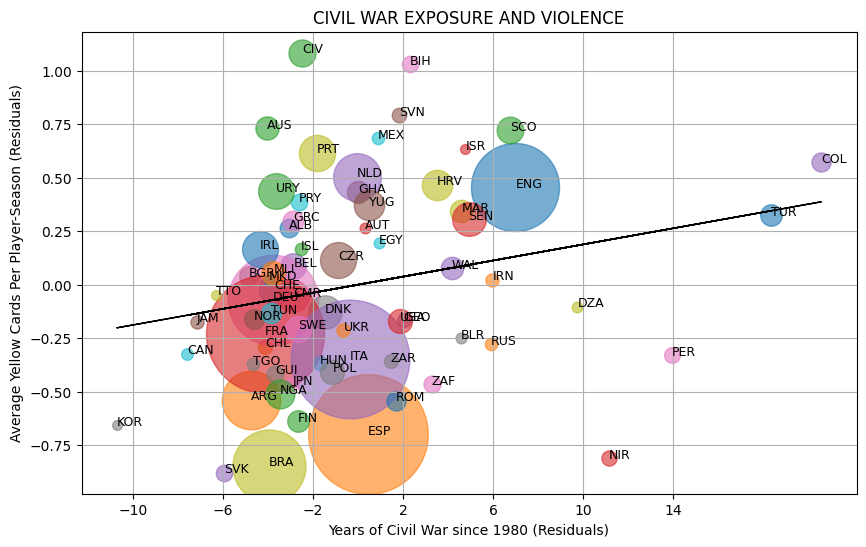

In [ ]:
wb_codes.rename(columns={'id': 'nation'}, inplace=True)
wb_codes.sort_values('nation', inplace=True)
soccer_data.drop(columns='num_country', inplace=True, errors='ignore')
soccer_data.dropna(subset=['contract'], inplace=True)

conditions = (
    (soccer_data['italian'] == 1) | (soccer_data['champions'] == 1) |
    (soccer_data['english'] == 1) | (soccer_data['french'] == 1) |
    (soccer_data['german'] == 1) | (soccer_data['spanish'] == 1)
)
soccer_data = soccer_data[conditions]
soccer_data['num_country'] = soccer_data.groupby('nationality')['player_id'].transform('count')

merged_data = pd.merge(soccer_data, wb_codes, on='nation', how='left')

grouped = merged_data[merged_data['num_country'] >= 5].groupby('wb_code').agg({
    'yellow_card': 'sum',
    'civwar': 'sum',
    'nation': 'first',
    'num_country': 'first',
    'age': 'mean',
    'games_start': 'mean',
    'games_sub': 'mean',
    'defender': 'mean',
    'forward': 'mean',
    'midfield': 'mean',
    'goals': 'mean',
    'ln_contract': 'mean',
    'italian': 'mean',
    'champions': 'mean',
    'english': 'mean',
    'french': 'mean',
    'german': 'mean',
    'spanish': 'mean',
    'africa': 'mean',
    'asia': 'mean',
    'lac': 'mean',
    'east_europe': 'mean',
    'oecd': 'mean'
})

grouped['yellow_avg'] = grouped['yellow_card'] / grouped['num_country']
grouped['war_avg'] = grouped['civwar'] / grouped['num_country']

formula_yellow = 'yellow_avg ~ age + games_start + games_sub + defender + forward + midfield + goals + ln_contract + italian + champions + french + german + spanish + africa + asia + lac + east_europe'
model_yellow = smf.ols(formula=formula_yellow, data=grouped).fit()
grouped['yellowhat'] = model_yellow.predict(grouped)

formula_civwar = 'war_avg ~ age + games_start + games_sub + defender + forward + midfield + goals + ln_contract + italian + champions + french + german + spanish + africa + asia + lac + east_europe'
model_civwar = smf.ols(formula=formula_civwar, data=grouped).fit()
grouped['warhat'] = model_civwar.predict(grouped)

grouped['yellow_res'] = grouped['yellow_avg'] - grouped['yellowhat']
grouped['war_res'] = grouped['war_avg'] - grouped['warhat']

plt.figure(figsize=(10, 6))
for idx, row in grouped.iterrows():
    plt.scatter(row['war_res'], row['yellow_res'], s=row['num_country'] * 10, alpha=0.6)  # Adjust marker size proportionally
    plt.text(row['war_res'], row['yellow_res'], idx, fontsize=9)  # Add text labels


y = grouped['yellow_res']
x = grouped['war_res']
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, 'k-', linewidth=1)

plt.ylabel('Average Yellow Cards Per Player-Season (Residuals)')
plt.xlabel('Years of Civil War since 1980 (Residuals)')
plt.title('CIVIL WAR EXPOSURE AND VIOLENCE')
plt.grid(True)
plt.xticks(np.arange(-10, 18, 4))
plt.grid(True)
plt.show()

## Figure 3 <a name="Figure3"></a>

Yellow cards and civil war (conditional on control variables in Table 2, regression 1) –
non-OECD countries.

Added a simple one line of code to filter out OECD countries. Still not sure what the CIV circle is. Maybe just drop it

In [ ]:
wb_codes = pd.read_csv("/content/drive/My Drive/Econ 148 Project 3/Soccer_Replication/Soccer_Replication/Wb_codes.csv")
soccer_data = pd.read_stata("/content/drive/My Drive/Econ 148 Project 3/Soccer_Replication/Soccer_Replication/soccer_data.dta")

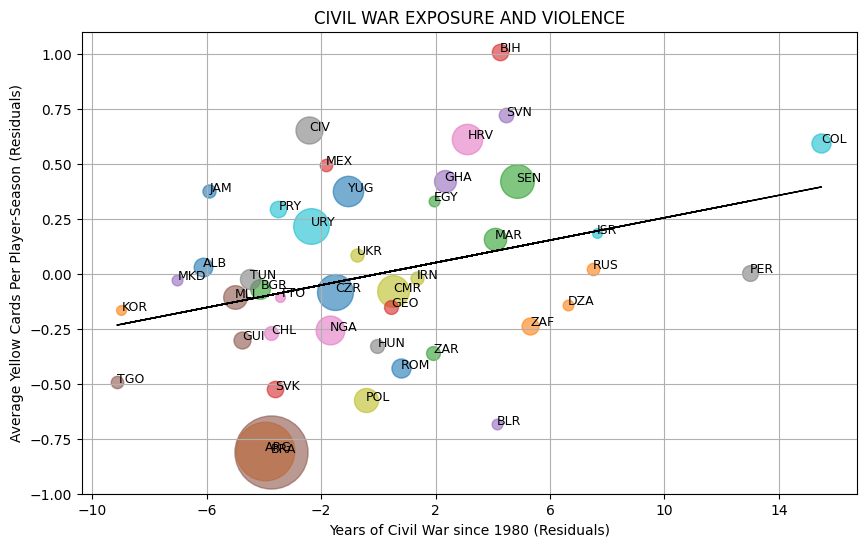

In [ ]:
wb_codes.rename(columns={'id': 'nation'}, inplace=True)
wb_codes.sort_values('nation', inplace=True)
soccer_data.drop(columns='num_country', inplace=True, errors='ignore')
soccer_data.dropna(subset=['contract'], inplace=True)

conditions = (
    (soccer_data['italian'] == 1) | (soccer_data['champions'] == 1) |
    (soccer_data['english'] == 1) | (soccer_data['french'] == 1) |
    (soccer_data['german'] == 1) | (soccer_data['spanish'] == 1)
)
soccer_data = soccer_data[conditions]
soccer_data['num_country'] = soccer_data.groupby('nationality')['player_id'].transform('count')

soccer_data = soccer_data[soccer_data['oecd'] == 0]
merged_data = pd.merge(soccer_data, wb_codes, on='nation', how='left')

grouped = merged_data[merged_data['num_country'] >= 5].groupby('wb_code').agg({
    'yellow_card': 'sum',
    'civwar': 'sum',
    'nation': 'first',
    'num_country': 'first',
    'age': 'mean',
    'games_start': 'mean',
    'games_sub': 'mean',
    'defender': 'mean',
    'forward': 'mean',
    'midfield': 'mean',
    'goals': 'mean',
    'ln_contract': 'mean',
    'italian': 'mean',
    'champions': 'mean',
    'english': 'mean',
    'french': 'mean',
    'german': 'mean',
    'spanish': 'mean',
    'africa': 'mean',
    'asia': 'mean',
    'lac': 'mean',
    'east_europe': 'mean',
    'oecd': 'mean'
})

grouped['yellow_avg'] = grouped['yellow_card'] / grouped['num_country']
grouped['war_avg'] = grouped['civwar'] / grouped['num_country']

formula_yellow = 'yellow_avg ~ age + games_start + games_sub + defender + forward + midfield + goals + ln_contract + italian + champions + french + german + spanish + africa + asia + lac + east_europe'
model_yellow = smf.ols(formula=formula_yellow, data=grouped).fit()
grouped['yellowhat'] = model_yellow.predict(grouped)

formula_civwar = 'war_avg ~ age + games_start + games_sub + defender + forward + midfield + goals + ln_contract + italian + champions + french + german + spanish + africa + asia + lac + east_europe'
model_civwar = smf.ols(formula=formula_civwar, data=grouped).fit()
grouped['warhat'] = model_civwar.predict(grouped)

grouped['yellow_res'] = grouped['yellow_avg'] - grouped['yellowhat']
grouped['war_res'] = grouped['war_avg'] - grouped['warhat']

plt.figure(figsize=(10, 6))
for idx, row in grouped.iterrows():
    plt.scatter(row['war_res'], row['yellow_res'], s=row['num_country'] * 10, alpha=0.6)  # Adjust marker size proportionally
    plt.text(row['war_res'], row['yellow_res'], idx, fontsize=9)  # Add text labels


y = grouped['yellow_res']
x = grouped['war_res']
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, 'k-', linewidth=1)

plt.ylabel('Average Yellow Cards Per Player-Season (Residuals)')
plt.xlabel('Years of Civil War since 1980 (Residuals)')
plt.title('CIVIL WAR EXPOSURE AND VIOLENCE')
plt.grid(True)
plt.xticks(np.arange(-10, 18, 4))
plt.yticks(np.arange(-1, 1.1, .25))
plt.grid(True)
plt.show()

## Figure 4 <a name="Figure4"></a>

Yellow cards and civil war (conditional on control variables in Table 2, regression 1) –
non-OECD countries, excluding Colombia, Iran, Israel, Peru, and Turkey.

Simply added another column

In [ ]:
wb_codes = pd.read_csv("/content/drive/My Drive/Econ 148 Project 3/Soccer_Replication/Soccer_Replication/Wb_codes.csv")
soccer_data = pd.read_stata("/content/drive/My Drive/Econ 148 Project 3/Soccer_Replication/Soccer_Replication/soccer_data.dta")

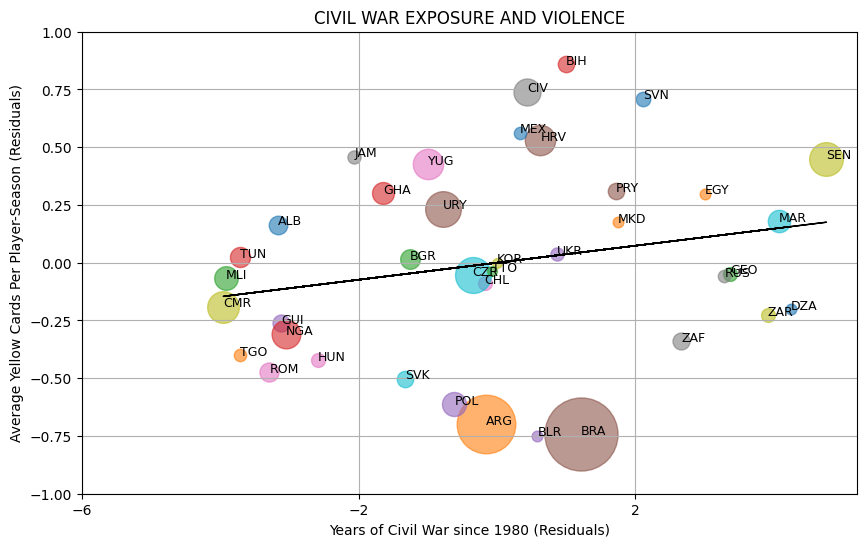

In [ ]:
wb_codes.rename(columns={'id': 'nation'}, inplace=True)
wb_codes.sort_values('nation', inplace=True)
soccer_data.drop(columns='num_country', inplace=True, errors='ignore')
soccer_data.dropna(subset=['contract'], inplace=True)

conditions = (
    (soccer_data['italian'] == 1) | (soccer_data['champions'] == 1) |
    (soccer_data['english'] == 1) | (soccer_data['french'] == 1) |
    (soccer_data['german'] == 1) | (soccer_data['spanish'] == 1)
)
soccer_data = soccer_data[conditions]
soccer_data['num_country'] = soccer_data.groupby('nationality')['player_id'].transform('count')

soccer_data = soccer_data[soccer_data['oecd'] == 0]
exclude_nations = [23, 52, 54, 78, 101]
soccer_data = soccer_data[~soccer_data['nation'].isin(exclude_nations)]
merged_data = pd.merge(soccer_data, wb_codes, on='nation', how='left')

grouped = merged_data[merged_data['num_country'] >= 5].groupby('wb_code').agg({
    'yellow_card': 'sum',
    'civwar': 'sum',
    'nation': 'first',
    'num_country': 'first',
    'age': 'mean',
    'games_start': 'mean',
    'games_sub': 'mean',
    'defender': 'mean',
    'forward': 'mean',
    'midfield': 'mean',
    'goals': 'mean',
    'ln_contract': 'mean',
    'italian': 'mean',
    'champions': 'mean',
    'english': 'mean',
    'french': 'mean',
    'german': 'mean',
    'spanish': 'mean',
    'africa': 'mean',
    'asia': 'mean',
    'lac': 'mean',
    'east_europe': 'mean',
    'oecd': 'mean'
})

grouped['yellow_avg'] = grouped['yellow_card'] / grouped['num_country']
grouped['war_avg'] = grouped['civwar'] / grouped['num_country']

formula_yellow = 'yellow_avg ~ age + games_start + games_sub + defender + forward + midfield + goals + ln_contract + italian + champions + french + german + spanish + africa + asia + lac + east_europe'
model_yellow = smf.ols(formula=formula_yellow, data=grouped).fit()
grouped['yellowhat'] = model_yellow.predict(grouped)

formula_civwar = 'war_avg ~ age + games_start + games_sub + defender + forward + midfield + goals + ln_contract + italian + champions + french + german + spanish + africa + asia + lac + east_europe'
model_civwar = smf.ols(formula=formula_civwar, data=grouped).fit()
grouped['warhat'] = model_civwar.predict(grouped)

grouped['yellow_res'] = grouped['yellow_avg'] - grouped['yellowhat']
grouped['war_res'] = grouped['war_avg'] - grouped['warhat']

plt.figure(figsize=(10, 6))
for idx, row in grouped.iterrows():
    plt.scatter(row['war_res'], row['yellow_res'], s=row['num_country'] * 10, alpha=0.6)  # Adjust marker size proportionally
    plt.text(row['war_res'], row['yellow_res'], idx, fontsize=9)  # Add text labels


y = grouped['yellow_res']
x = grouped['war_res']
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, 'k-', linewidth=1)

plt.ylabel('Average Yellow Cards Per Player-Season (Residuals)')
plt.xlabel('Years of Civil War since 1980 (Residuals)')
plt.title('CIVIL WAR EXPOSURE AND VIOLENCE')
plt.grid(True)
plt.xticks(np.arange(-6, 6, 4))
plt.yticks(np.arange(-1, 1.1, .25))
plt.grid(True)
plt.show()

## Table A1 <a name="TableA1"></a>

In [ ]:
wb_codes = pd.read_csv("/content/drive/My Drive/Econ 148 Project 3/Soccer_Replication/Soccer_Replication/Wb_codes.csv")
soccer_data = pd.read_stata("/content/drive/My Drive/Econ 148 Project 3/Soccer_Replication/Soccer_Replication/soccer_data.dta")

# Merge the soccer_data with wb_codes based on the country code
soccer_data_merged = soccer_data.merge(wb_codes, how='left', left_on='nation', right_on='id')

# Define the conditions for filtering


condition = (
    soccer_data_merged["italian"].notna() |
    soccer_data_merged["champions"].notna() |
    soccer_data_merged["english"].notna() |
    soccer_data_merged["french"].notna() |
    soccer_data_merged["german"].notna() |
    soccer_data_merged["spanish"].notna()
) & (soccer_data_merged['num_country'] >= 5)

soccer_data_merged = soccer_data_merged[condition]
soccer_data_merged = soccer_data_merged.dropna(subset=["ln_contract"])
soccer_data_merged['Country with code'] = soccer_data_merged['nationality'] + ' (' +soccer_data_merged['wb_code'] + ')'

# We are interested in the average number of yellow cards and civil war years per player, grouped by country
# We will first group by the country code and then calculate the mean for yellow cards and civil war years
aggregated_data = soccer_data_merged.groupby('Country with code').agg(
    Observations=('player_name', 'size'),
    Yellow_cards=('yellow_card', 'mean'),
    Civil_war_years=('civwar', 'mean')
).reset_index()

# Since the table in the image has two separate sections, we might need to split the dataframe in half
# and format it in a way that matches the provided table structure.
# However, we'll create a single dataframe and leave the splitting and styling for the display part

# Sort the countries alphabetically
aggregated_data_sorted = aggregated_data.sort_values(by='Country with code')

# Now, let's prepare it in a tabular format that can be printed or displayed similarly to the table in the image
# We will round the means to two decimal places to match the formatting in the example table
aggregated_data_sorted['Yellow_cards'] = aggregated_data_sorted['Yellow_cards'].round(2)
aggregated_data_sorted['Civil_war_years'] = aggregated_data_sorted['Civil_war_years'].round(2)

# Output the data to be checked and for further processing
aggregated_data_sorted['Civil_war_years'] =  aggregated_data_sorted['Civil_war_years'].astype('int64')# Display the first few rows for verification purposes
aggregated_data_sorted.rename(columns={'Country with code': 'Country', 'Yellow_cards': 'Yellow cards', 'Civil_war_years': 'Civil war years'}, inplace=True)
aggregated_data_sorted

,Country,Observations,Yellow cards,Civil war years
0,Albania (ALB),18,2.89,0
1,Algeria (DZA),6,1.50,15
2,Argentina (ARG),178,2.92,0
3,Australia (AUS),28,2.57,0
4,Austria (AUT),6,1.67,0
...,...,...,...,...
66,Turkey (TUR),24,2.25,22
67,Ukraine (UKR),9,1.44,0
68,United States (USA),30,0.97,4
69,Uruguay (URY),66,2.89,0


In [ ]:
num_rows = len(aggregated_data_sorted)
midpoint = num_rows // 2  # Find the midpoint to split the table

# Split the table into two
left_table = aggregated_data_sorted.iloc[:midpoint, :]
right_table = aggregated_data_sorted.iloc[midpoint:, :]

# Reset index on the right table to start from 0
right_table.reset_index(drop=True, inplace=True)

# Convert the left and right halves of the DataFrame to LaTeX
left_latex = left_table.to_latex(index=False, header=True, float_format="%.2f", longtable=False)
right_latex = right_table.to_latex(index=False, header=True, float_format="%.2f", longtable=False)

# Manually combine the left and right LaTeX tables into a single LaTeX table with two columns
latex_code = "\\begin{table}[ht]\n\\centering\n"
latex_code += "\\caption{Countries and Players Represented in the Main Sample}\n"
latex_code += "\\label{tab:countries_players}\n"
latex_code += "\\begin{tabular}{llrrllrr}\n"
latex_code += "\\toprule\n"

# Add column headers
latex_code += " & ".join(left_table.columns) + " & " + " & ".join(right_table.columns) + " \\\\\n"
latex_code += "\\midrule\n"

# Add rows from both tables side by side
for i in range(max(len(left_table), len(right_table))):
    left_row = " & ".join(left_table.iloc[i].astype(str)) if i < len(left_table) else " & & & "
    right_row = " & ".join(right_table.iloc[i].astype(str)) if i < len(right_table) else ""
    latex_code += left_row + " & " + right_row + " \\\\\n"

latex_code += "\\bottomrule\n"
latex_code += "\\end{tabular}\n"
latex_code += "\\end{table}"



In [ ]:
latex_code

"\\begin{table}[ht]\n\\centering\n\\caption{Countries and Players Represented in the Main Sample}\n\\label{tab:countries_players}\n\\begin{tabular}{llrrllrr}\n\\toprule\nCountry & Observations & Yellow cards & Civil war years & Country & Observations & Yellow cards & Civil war years \\\\\n\\midrule\nAlbania (ALB) & 18 & 2.89 & 0 & Jamaica (JAM) & 9 & 1.78 & 0 \\\\\nAlgeria (DZA) & 6 & 1.5 & 15 & Japan (JPN) & 10 & 1.5 & 0 \\\\\nArgentina (ARG) & 178 & 2.92 & 0 & Macedonia (MKD) & 6 & 4.17 & 1 \\\\\nAustralia (AUS) & 28 & 2.57 & 0 & Mali (MLI) & 29 & 3.03 & 2 \\\\\nAustria (AUT) & 6 & 1.67 & 0 & Mexico (MEX) & 8 & 3.62 & 2 \\\\\nBelarus (BLR) & 6 & 1.5 & 0 & Morocco (MAR) & 26 & 3.15 & 10 \\\\\nBelgium (BEL) & 34 & 1.91 & 0 & Netherlands (NLD) & 118 & 2.07 & 0 \\\\\nBosnia and Herzegovina (BIH) & 14 & 2.93 & 4 & Nigeria (NGA) & 43 & 1.81 & 1 \\\\\nBrazil (BRA) & 277 & 2.44 & 0 & Northern Ireland (NIR) & 12 & 1.0 & 13 \\\\\nBulgaria (BGR) & 20 & 2.55 & 0 & Norway (NOR) & 20 & 1.75 & 0 \\